# **ARTIFICIAL INTELLIGENCE GROUP 4 MAJOR PROJECT**

# **IMPORTING LIBRARIES**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# **READING DATASET**

In [10]:
df=pd.read_csv(r"cardio_train.csv", sep=';')
print(df.isnull().sum())
df['age'] = df['age'] // 365.25
x=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
y=df.iloc[:,12]

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


# **PRE-PROCESSING**

## **Histogram Of Weight Distribution**

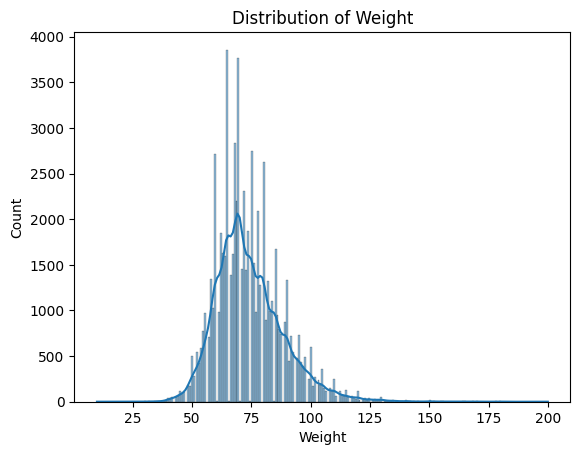

In [11]:
sns.histplot(df['weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

From the Weight Distribution we can see that the dataset is roughly follows the Bell Curve. Hence, we can say that this data replicates real life scenarios and can be used to find the best Machine Learning Model to predict Cardio-Vascular Diseases.

## **Box Plot Of Weight By Gender**

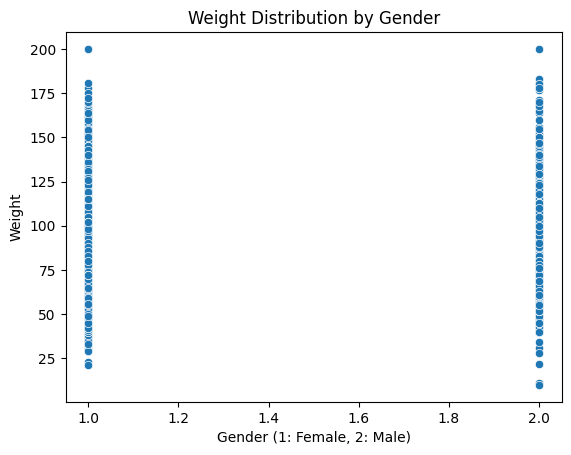

In [12]:
sns.scatterplot(x='gender', y='weight', data=df)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Weight')
plt.show()

From the Weight Distribution we can see that the dataset is pretty evenly split between the genders. Hence, we don't need to worry about overfitting due to the gender.

## **Scatter Plot Of Weight VS Age**

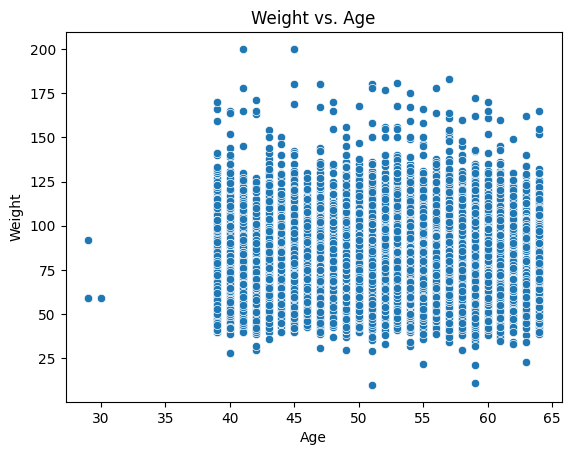

In [13]:
sns.scatterplot(x='age', y='weight', data=df)
plt.title('Weight vs. Age')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

From the Weight Distribution we can see that the dataset is pretty evenly split between the ages. Hence, we don't need to worry about overfitting due to the age.

## **Correlation Heatmap**

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022762 -0.081373  0.053567  0.020932  0.017553   
gender      -0.022762  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081373  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053567  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020932  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017553  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.153998 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098529 -0.020491 -0.018595  0.106857  0.011841  0.010806   
cardio       0.237949  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol      gluc    cardio  
age             0.153998  0.098529  0.237949  
gender         -0.035821 -0.020491  0.008109  
height         -0.050226 -0.018595 -0.010821  
weight          0.141768  0.106857  0.181660  
ap_hi         

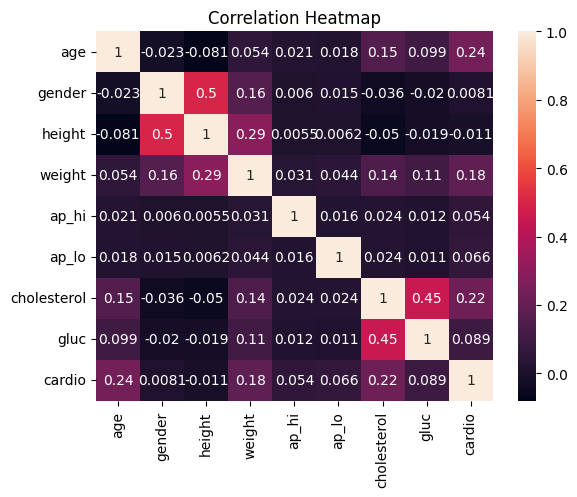

In [14]:
corr_matrix = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

From the Correlation Heatmap, we can infer that the data has Weak Correlation and can be used without modifying the dataset.

## **Weight Distribution By Cardiovascular Disease Presence**

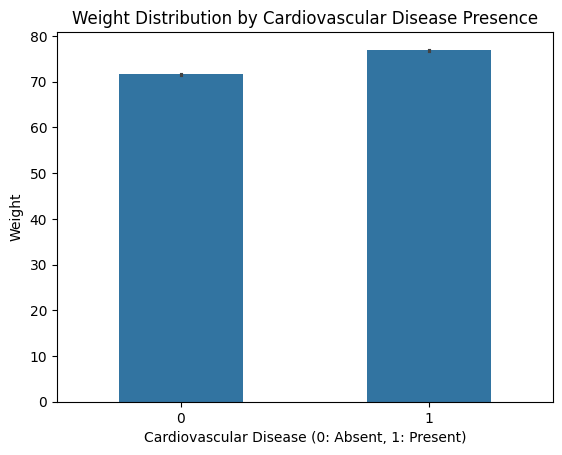

In [15]:
sns.barplot(x='cardio', y='weight', data=df,width=0.5)
plt.title('Weight Distribution by Cardiovascular Disease Presence')
plt.xlabel('Cardiovascular Disease (0: Absent, 1: Present)')
plt.ylabel('Weight')
plt.show()

From the Weight Distribution we can see that the dataset is pretty evenly split between the classifications.
Hence, we don't need to worry about overfitting due to the data split.

# **PAIR PLOT OF COLUMNS**

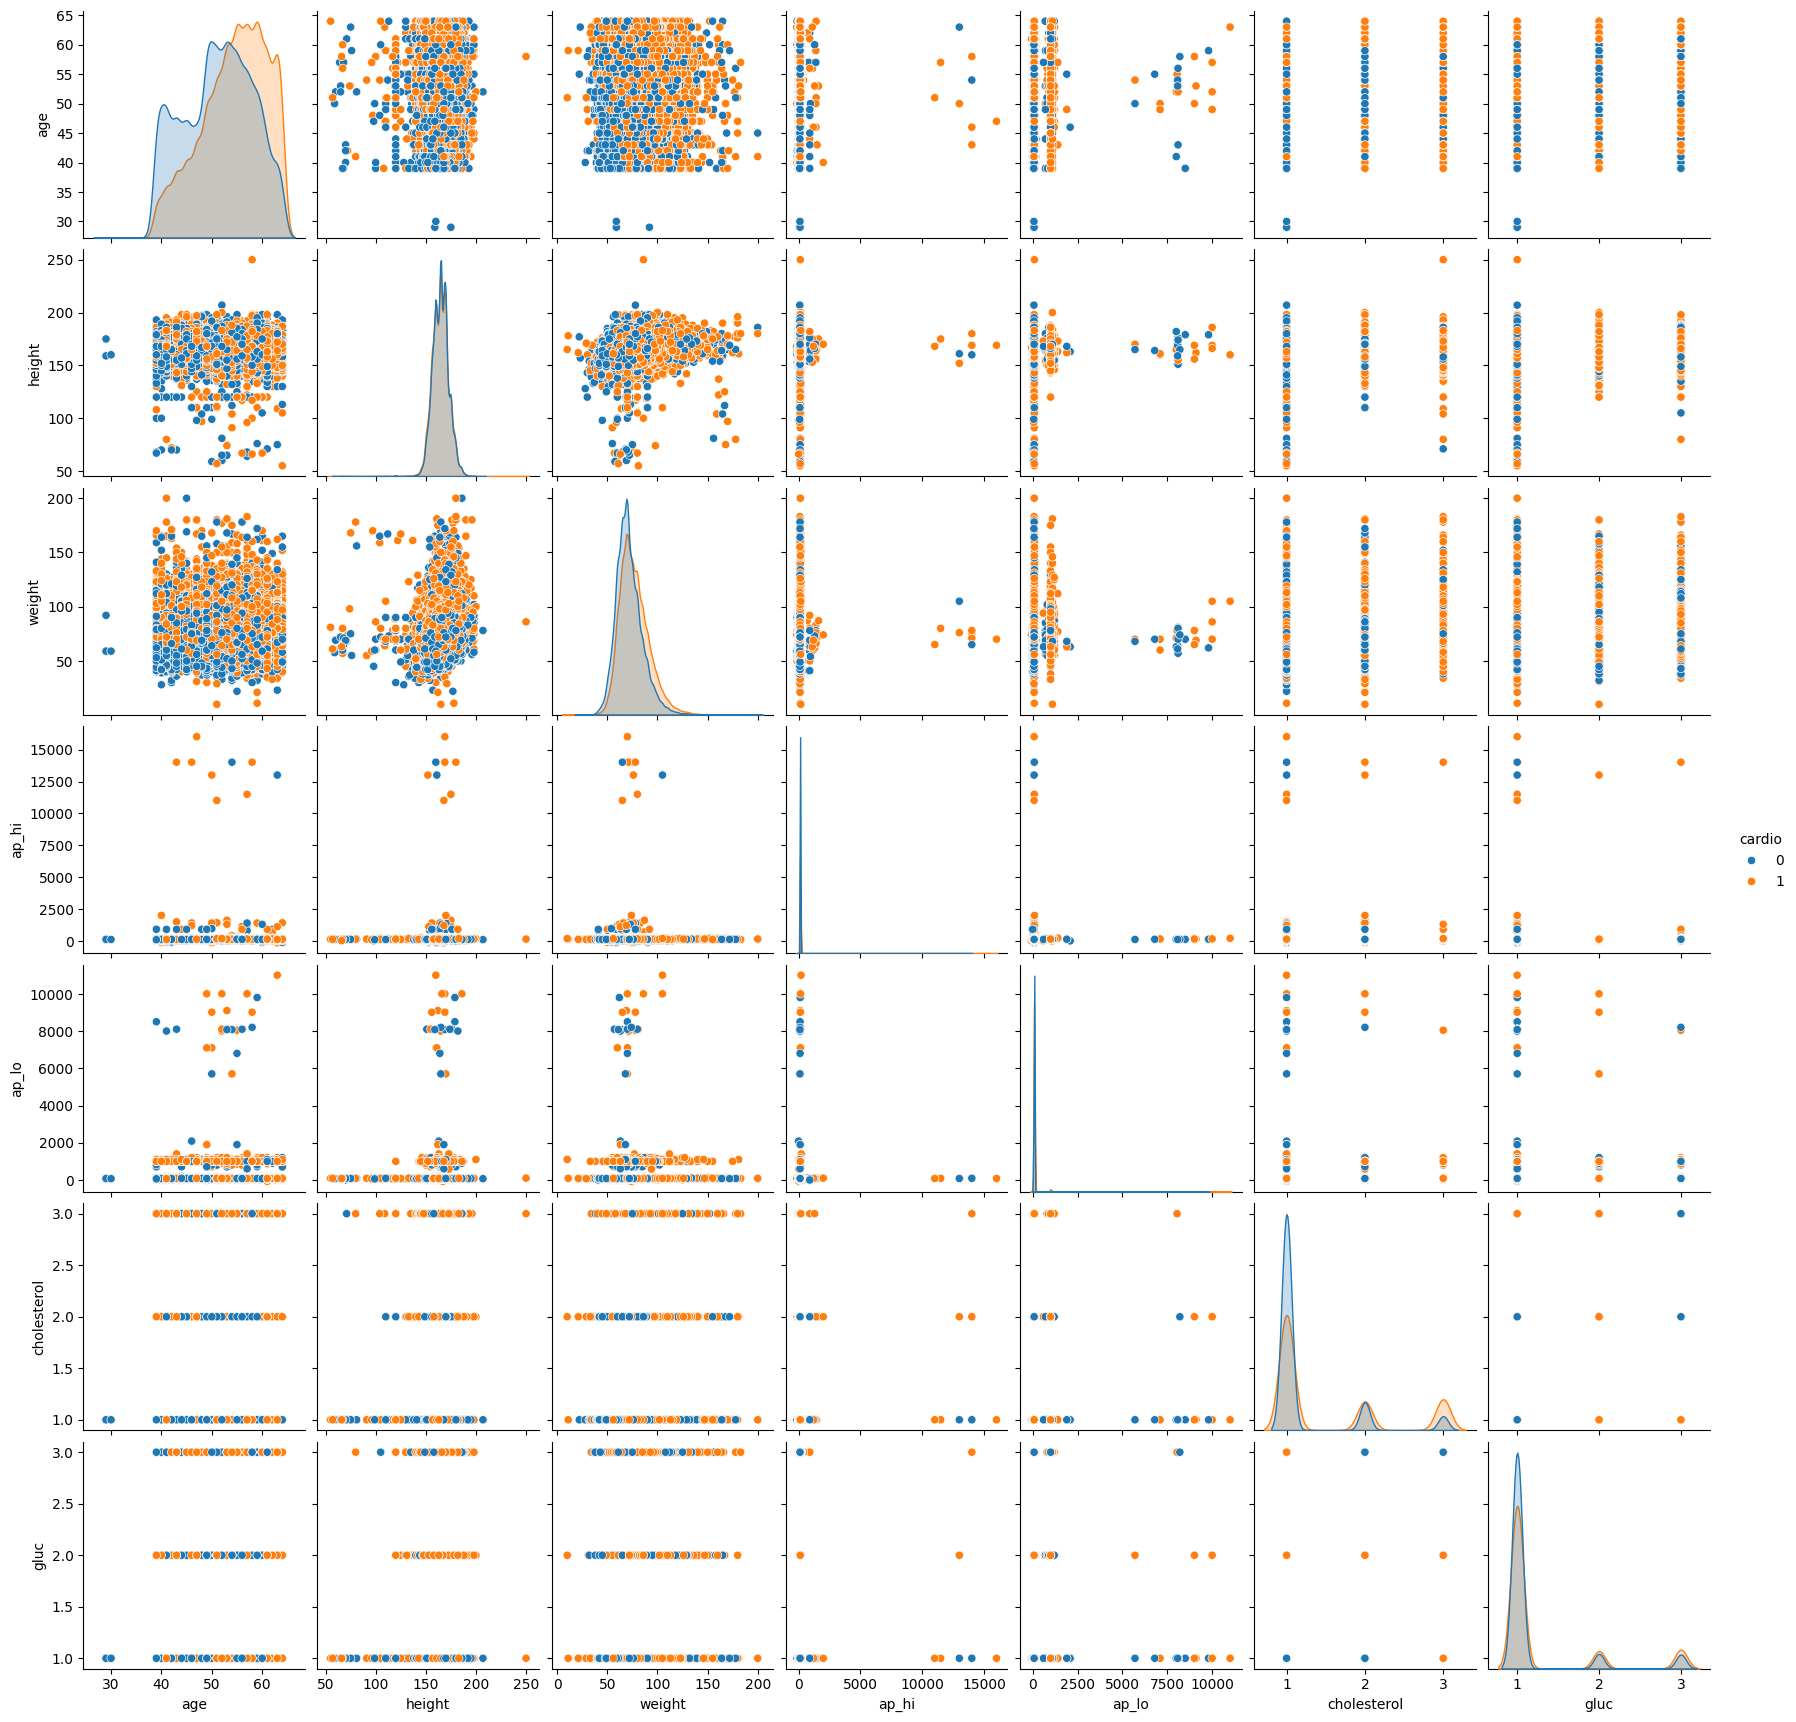

In [16]:
lists = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'cardio']
sns.pairplot(df[lists], hue='cardio')
plt.show()

# **SPLITTING THE DATA AND STANDARIZING**

**80-20 Split**

In [17]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train1 = scaler.fit_transform(xtrain1)
X_test1 = scaler.transform(xtest1)
xtrain1 = pd.DataFrame(X_train1, columns=x.columns)
xtest1 = pd.DataFrame(X_test1, columns=x.columns)

**70-30 Split**

In [18]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(xtrain2)
X_test2 = scaler.transform(xtest2)
xtrain2 = pd.DataFrame(X_train2, columns=x.columns)
xtest2 = pd.DataFrame(X_test2, columns=x.columns)

**60-40 Split**

In [19]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train3 = scaler.fit_transform(xtrain3)
X_test3 = scaler.transform(xtest3)
xtrain3 = pd.DataFrame(X_train3, columns=x.columns)
xtest3 = pd.DataFrame(X_test3, columns=x.columns)


# **LOGISTIC REGRESSION**

In [20]:
lr = LogisticRegression()
lr.fit(xtrain1, ytrain1)
ypred1 = lr.predict(xtest1)
lr.fit(xtrain2, ytrain2)
ypred2 = lr.predict(xtest2)
lr.fit(xtrain3, ytrain3)
ypred3 = lr.predict(xtest3)

print(ypred1)
accuracy11 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy11*100:.3f}')
print(ypred2)
accuracy12 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy12*100:.3f}')
print(ypred3)
accuracy13 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy13*100:.3f}')

[1 1 1 ... 0 1 1]
Accuracy (80-20): 72.207
[1 1 1 ... 0 1 1]
Accuracy (70-30): 72.062
[1 1 1 ... 0 1 1]
Accuracy (60-40): 71.739


## Best Accuracy from Logistic Regression: **72.207** using the 80-20 Split.

# ***DECISION TREE***

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain1, ytrain1)
ypred1 = dtc.predict(xtest1)
dtc.fit(xtrain2, ytrain2)
ypred2 = dtc.predict(xtest2)
dtc.fit(xtrain3, ytrain3)
ypred3 = dtc.predict(xtest3)

print(ypred1)
accuracy21 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy21*100:.3f}')
print(ypred2)
accuracy22 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy22*100:.3f}')
print(ypred3)
accuracy23 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy23*100:.3f}')

[1 1 0 ... 0 1 1]
Accuracy (80-20): 63.736
[1 0 0 ... 0 0 1]
Accuracy (70-30): 63.362
[1 1 1 ... 0 1 1]
Accuracy (60-40): 63.768


## Best Accuracy from Decision Trees: **63.768** using the 60-40 Split

# **RANDOM FOREST**

In [22]:
rf = RandomForestClassifier(n_estimators=35,criterion='entropy')
rf.fit(xtrain1, ytrain1)
ypred1 = rf.predict(xtest1)
rf.fit(xtrain2, ytrain2)
ypred2 = rf.predict(xtest2)
rf.fit(xtrain3, ytrain3)
ypred3 = rf.predict(xtest3)

print(ypred1)
accuracy31 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy31*100:.3f}')
print(ypred2)
accuracy32 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy32*100:.3f}')
print(ypred3)
accuracy33 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy33*100:.3f}')

[1 1 0 ... 1 1 1]
Accuracy (80-20): 70.407
[1 1 1 ... 1 1 1]
Accuracy (70-30): 70.643
[1 1 1 ... 1 1 1]
Accuracy (60-40): 70.889


## Best Accuracy from Random Forests: **70.889** using the 60-40 Split.

# **GAUSIAN NAIVE BAYES**

In [23]:
gnb = GaussianNB()
gnb.fit(xtrain1, ytrain1)
ypred1 = gnb.predict(xtest1)
gnb.fit(xtrain2, ytrain2)
ypred2 = gnb.predict(xtest2)
gnb.fit(xtrain3, ytrain3)
ypred3 = gnb.predict(xtest3)

print(ypred1)
accuracy41 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy41*100:.3f}')
print(ypred2)
accuracy42 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy42*100:.3f}')
print(ypred3)
accuracy43 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy43*100:.3f}')

[0 0 0 ... 0 1 0]
Accuracy (80-20): 59.357
[0 0 0 ... 0 0 0]
Accuracy (70-30): 59.471
[0 0 0 ... 0 1 1]
Accuracy (60-40): 59.750


## Best Accuracy from Guasian Naive Bayes: **59.750** using the 60-40 Split.

# **KNN**

In [24]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(xtrain1, ytrain1)
ypred1 = knn.predict(xtest1)
knn.fit(xtrain2, ytrain2)
ypred2 = knn.predict(xtest2)
knn.fit(xtrain3, ytrain3)
ypred3 = knn.predict(xtest3)

print(ypred1)
accuracy51 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy51*100:.3f}')
print(ypred2)
accuracy52 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy52*100:.3f}')
print(ypred3)
accuracy53 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy53*100:.3f}')

[1 1 1 ... 1 1 0]
Accuracy (80-20): 67.014
[1 1 1 ... 0 1 1]
Accuracy (70-30): 66.471
[1 1 1 ... 0 1 1]
Accuracy (60-40): 66.029


## Best Accuracy from KNN: **67.014** using the 80-20 Split.

# **SVM**

In [25]:
svm = SVC(kernel='linear')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy161 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Linear Kernel (80-20): {accuracy161*100:.3f}')
print(ypred2)
accuracy162 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Linear Kernel (70-30): {accuracy162*100:.3f}')
print(ypred3)
accuracy163 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Linear Kernel (60-40): {accuracy163*100:.3f}')

[1 1 1 ... 0 1 1]
Accuracy Linear Kernel (80-20): 72.650
[1 1 1 ... 0 1 1]
Accuracy Linear Kernel (70-30): 72.567
[1 1 1 ... 0 1 1]
Accuracy Linear Kernel (60-40): 72.511


In [26]:
svm = SVC(kernel='poly', C=7)
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy261 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Poly Kernel (80-20): {accuracy261*100:.3f}')
print(ypred2)
accuracy262 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Poly Kernel (70-30): {accuracy262*100:.3f}')
print(ypred3)
accuracy263 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Poly Kernel (60-40): {accuracy263*100:.3f}')

[1 1 1 ... 0 1 1]
Accuracy Poly Kernel (80-20): 70.857
[1 1 1 ... 0 1 1]
Accuracy Poly Kernel (70-30): 70.571
[1 1 1 ... 0 1 1]
Accuracy Poly Kernel (60-40): 70.079


In [27]:
svm = SVC(kernel='rbf', C=12, gamma='auto')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy361 = accuracy_score(ytest1, ypred1)
print(f'Accuracy RBF Kernel (80-20): {accuracy361*100:.3f}')
print(ypred2)
accuracy362 = accuracy_score(ytest2, ypred2)
print(f'Accuracy RBF Kernel (70-30): {accuracy362*100:.3f}')
print(ypred3)
accuracy363 = accuracy_score(ytest3, ypred3)
print(f'Accuracy RBF Kernel (60-40): {accuracy363*100:.3f}')

[1 1 1 ... 1 1 1]
Accuracy RBF Kernel (80-20): 73.271
[1 1 1 ... 1 1 1]
Accuracy RBF Kernel (70-30): 73.457
[1 1 1 ... 1 1 1]
Accuracy RBF Kernel (60-40): 73.150


In [28]:
svm = SVC(kernel='sigmoid')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy461 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Sigmoid Kernel (80-20): {accuracy461*100:.3f}')
print(ypred2)
accuracy462 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Sigmoid Kernel (70-30): {accuracy462*100:.3f}')
print(ypred3)
accuracy463 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Sigmoid Kernel (60-40): {accuracy463*100:.3f}')

[1 1 1 ... 1 1 0]
Accuracy Sigmoid Kernel (80-20): 57.036
[1 1 1 ... 1 1 1]
Accuracy Sigmoid Kernel (70-30): 57.357
[0 1 1 ... 0 1 1]
Accuracy Sigmoid Kernel (60-40): 56.693


## Best Accuracy from SVM: **73.457** using the 70-30 Split and RBF Kernel.

# **XG BOOST**

In [29]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(xtrain1, ytrain1)
ypred1 = xgb.predict(xtest1)
xgb.fit(xtrain2, ytrain2)
ypred2 = xgb.predict(xtest2)
xgb.fit(xtrain3, ytrain3)
ypred3 = xgb.predict(xtest3)

print(ypred1)
accuracy71 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy71*100:.3f}')
print(ypred2)
accuracy72 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy72*100:.3f}')
print(ypred3)
accuracy73 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy73*100:.3f}')

[1 1 1 ... 1 1 1]
Accuracy (80-20): 73.607
[1 1 1 ... 1 1 1]
Accuracy (70-30): 73.714
[1 1 1 ... 1 1 1]
Accuracy (60-40): 73.443


## Best Accuracy from XG Boost: **73.714** using the 70-30 Split.

# **From this we can conclude that using *XG-BOOST* as our Machine Learning Model for Prediction of Cardio-Vascular diseases is the best choice.**